# Decision Tree Algorithms

Decision tree algorithms are supervised learning methods used for classification and regression tasks. They work by recursively splitting the data into subsets based on the value of input features, forming a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a class label or a continuous value.

## Theory

A decision tree is constructed by selecting the best feature to split the data at each node. The "best" feature is chosen based on a criterion that measures the quality of the split. Common criteria include **Information Gain** (based on entropy) and **Gini Impurity**.

### Entropy

Entropy measures the impurity or uncertainty in a dataset. For a dataset $S$ with $c$ classes, the entropy is defined as:

$$
H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i
$$

where $p_i$ is the proportion of samples in class $i$.

### Information Gain

Information Gain measures the reduction in entropy after a dataset is split on a feature $A$:

$$
IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

where $S_v$ is the subset of $S$ where feature $A$ has value $v$.

### Gini Impurity

Gini impurity is another measure of impurity, defined as:

$$
Gini(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

Lower Gini impurity indicates a purer node.

## Tree Construction

The tree is built recursively:

1. At each node, select the feature that yields the highest information gain or lowest Gini impurity.
2. Split the dataset based on the selected feature.
3. Repeat the process for each child node until a stopping criterion is met (e.g., all samples belong to one class, or a maximum tree depth is reached).

## Prediction

To make a prediction, traverse the tree from the root to a leaf, following the decisions at each node based on the input features.

## Advantages and Disadvantages

**Advantages:**
- Easy to interpret and visualize.
- Can handle both numerical and categorical data.
- Requires little data preprocessing.

**Disadvantages:**
- Prone to overfitting.
- Unstable to small variations in data.
- Can create biased trees if some classes dominate.

Decision trees are the foundation for more advanced ensemble methods like Random Forests and Gradient Boosted Trees.

In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [481]:
df = pd.read_csv('../data/drugsComTest_raw.csv')

In [482]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [483]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [484]:
df.drop(['review','date'],axis=1)

,uniqueID,drugName,condition,rating,usefulCount
0,163740,Mirtazapine,Depression,10,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",8,17
2,159672,Bactrim,Urinary Tract Infection,9,3
3,39293,Contrave,Weight Loss,9,35
4,97768,Cyclafem 1 / 35,Birth Control,9,4
...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention",10,43
53762,140714,Escitalopram,Anxiety,9,11
53763,130945,Levonorgestrel,Birth Control,8,7
53764,47656,Tapentadol,Pain,1,20


In [485]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [486]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [487]:
df.dropna(subset=['condition'], inplace=True)

In [488]:
df.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [489]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [490]:
df.drop(['date','review','uniqueID'], inplace=True, axis=1)

In [491]:
df.reset_index(drop=True, inplace=True)

In [492]:
df

,drugName,condition,rating,usefulCount
0,Mirtazapine,Depression,10,22
1,Mesalamine,"Crohn's Disease, Maintenance",8,17
2,Bactrim,Urinary Tract Infection,9,3
3,Contrave,Weight Loss,9,35
4,Cyclafem 1 / 35,Birth Control,9,4
...,...,...,...,...
53466,Tamoxifen,"Breast Cancer, Prevention",10,43
53467,Escitalopram,Anxiety,9,11
53468,Levonorgestrel,Birth Control,8,7
53469,Tapentadol,Pain,1,20


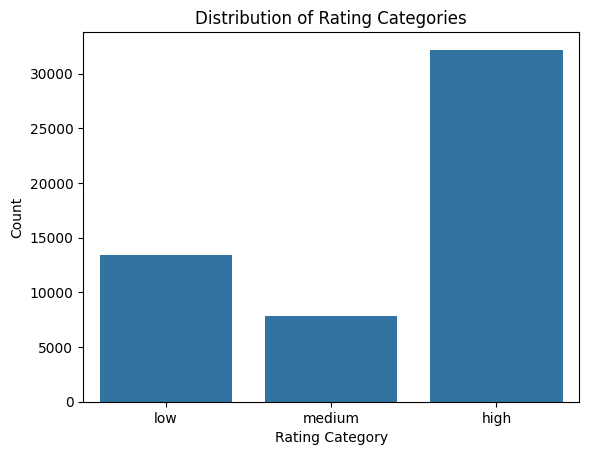

In [493]:
def categorize_rating(r):
    if r >= 8:
        return 'high'
    elif r >= 5:
        return 'medium'
    else:
        return 'low'

df['rating_category'] = df['rating'].apply(categorize_rating)

sns.countplot(data=df, x='rating_category', order=['low', 'medium', 'high'])
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()

In [494]:
df

,drugName,condition,rating,usefulCount,rating_category
0,Mirtazapine,Depression,10,22,high
1,Mesalamine,"Crohn's Disease, Maintenance",8,17,high
2,Bactrim,Urinary Tract Infection,9,3,high
3,Contrave,Weight Loss,9,35,high
4,Cyclafem 1 / 35,Birth Control,9,4,high
...,...,...,...,...,...
53466,Tamoxifen,"Breast Cancer, Prevention",10,43,high
53467,Escitalopram,Anxiety,9,11,high
53468,Levonorgestrel,Birth Control,8,7,high
53469,Tapentadol,Pain,1,20,low


In [495]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,drugName,condition,rating,usefulCount,rating_category
0,Mirtazapine,Depression,1.000000,0.023182,high
1,Mesalamine,"Crohn's Disease, Maintenance",0.777778,0.017914,high
2,Bactrim,Urinary Tract Infection,0.888889,0.003161,high
3,Contrave,Weight Loss,0.888889,0.036881,high
4,Cyclafem 1 / 35,Birth Control,0.888889,0.004215,high


In [496]:
df.describe()

,rating,usefulCount
count,53471.000000,53471.000000
mean,0.664092,0.029593
std,0.365136,0.038179
min,0.000000,0.000000
25%,0.333333,0.006322
50%,0.777778,0.016860
75%,1.000000,0.037935
max,1.000000,1.000000


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53471 entries, 0 to 53470
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   drugName         53471 non-null  object 
 1   condition        53471 non-null  object 
 2   rating           53471 non-null  float64
 3   usefulCount      53471 non-null  float64
 4   rating_category  53471 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [498]:
X = df.drop(['usefulCount','rating_category'], axis=1)
y = df['rating_category']

In [499]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [500]:
X,y

(              drugName                     condition    rating
 0          Mirtazapine                    Depression  1.000000
 1           Mesalamine  Crohn's Disease, Maintenance  0.777778
 2              Bactrim       Urinary Tract Infection  0.888889
 3             Contrave                   Weight Loss  0.888889
 4      Cyclafem 1 / 35                 Birth Control  0.888889
 ...                ...                           ...       ...
 53466        Tamoxifen     Breast Cancer, Prevention  1.000000
 53467     Escitalopram                       Anxiety  0.888889
 53468   Levonorgestrel                 Birth Control  0.777778
 53469       Tapentadol                          Pain  0.000000
 53470        Arthrotec                      Sciatica  0.888889
 
 [53471 rows x 3 columns],
 0        high
 1        high
 2        high
 3        high
 4        high
          ... 
 53466    high
 53467    high
 53468    high
 53469     low
 53470    high
 Name: rating_category, Length: 53471,